In [1]:
!pip install easyocr
!pip install imutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [17]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import os

In [18]:
# Path
zip_path = '/content/Licplatesdetection_train.zip'
extract_to = '/content/images'

# Extract the zip file
if not os.path.exists(extract_to):
    os.makedirs(extract_to)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("Images Extracted!")
else:
    print("Directory Already Exists:", extract_to)

# Get all image files
image_files = [f for f in os.listdir(extract_to) if f.endswith('.jpg') or f.endswith('.png')]

# Convert images to grayscale and store them
gray_images = []
for image_file in image_files:
    img_path = os.path.join(extract_to, image_file)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray)

# Display the first 5 grayscale images
plt.figure(figsize=(15, 10))
for i in range(min(5, len(gray_images))):
    plt.subplot(1, 5, i+1)
    plt.imshow(gray_images[i], cmap='gray')
    plt.title(image_files[i])
    plt.axis('off')

plt.show()


Directory Already Exists: /content/images


<Figure size 1500x1000 with 0 Axes>

Total Images Found: 900


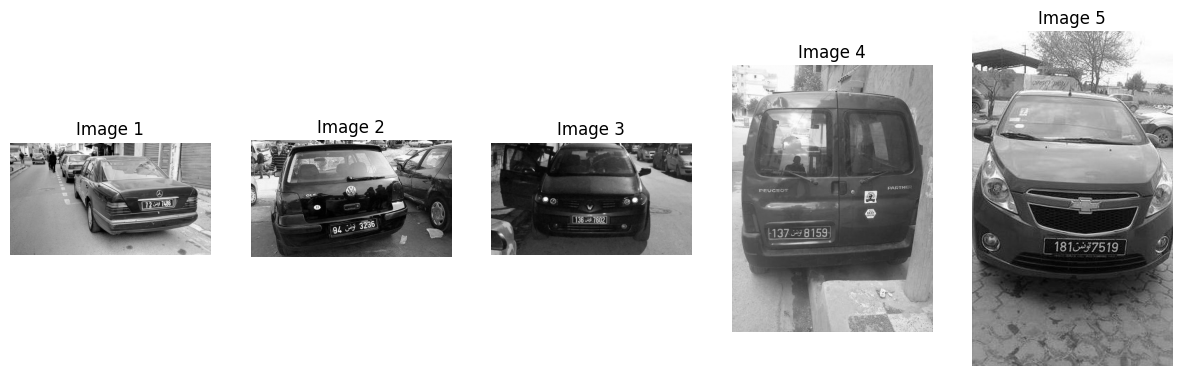

In [19]:
# Path to the folder containing images
image_folder = '/content/images/license_plates_detection_train'

# Get all image filenames from the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Check if images are found
print("Total Images Found:", len(image_files))
if len(image_files) == 0:
    print("No images found in the folder. Check the folder path.")
else:
    # Display first 5 grayscale images
    plt.figure(figsize=(15, 10))
    for i, image_file in enumerate(image_files[:5]):
        # Construct full image path
        img_path = os.path.join(image_folder, image_file)

        # Read and convert to grayscale
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Plotting the grayscale image
        plt.subplot(1, 5, i+1)
        plt.imshow(gray, cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')

    plt.show()


Total Images Found: 900


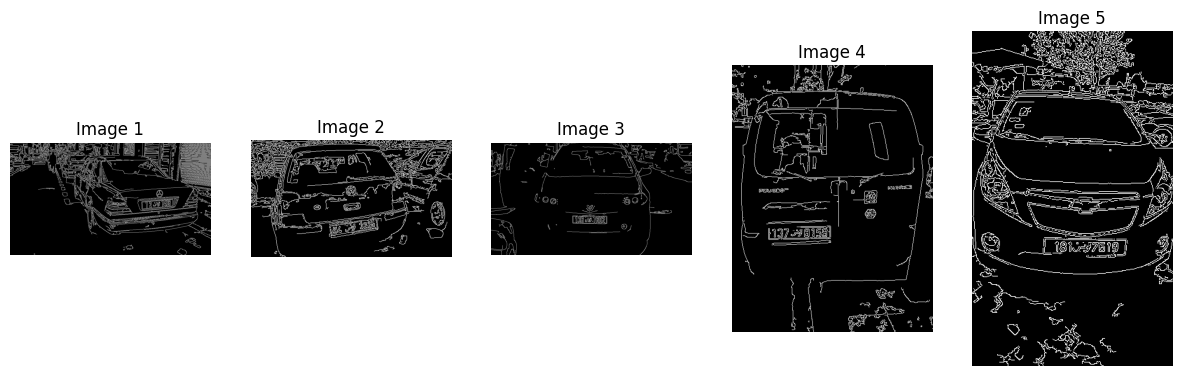

In [20]:
# Check if images are found
print("Total Images Found:", len(image_files))
if len(image_files) == 0:
    print("No images found in the folder. Check the folder path.")
else:
    # Display first 5 processed images
    plt.figure(figsize=(15, 10))
    for i, image_file in enumerate(image_files[:5]):
        # Construct full image path
        img_path = os.path.join(image_folder, image_file)

        # Read and convert to grayscale
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply bilateral filter for noise reduction
        bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

        # Perform Canny edge detection
        edged = cv2.Canny(bfilter, 30, 200)

        # Plotting the edge-detected image
        plt.subplot(1, 5, i+1)
        plt.imshow(edged, cmap='gray')
        plt.title(f"Image {i+1}")
        plt.axis('off')

    plt.show()


In [21]:
# Find contours in the edge-detected image
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Grab the contours properly using imutils
contours = imutils.grab_contours(keypoints)

# Sort the contours by area and take the top 10
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Display the number of contours found
print("Total Contours Found:", len(contours))


Total Contours Found: 10


In [22]:
location = None

# Loop through the contours
for contour in contours:
    # Approximate the contour
    approx = cv2.approxPolyDP(contour, 10, True)

    # Check if the approximated contour has 4 points (i.e., a quadrilateral)
    if len(approx) == 4:
        location = approx
        break  # Stop after finding the first quadrilateral

# Check if a location is found
if location is not None:
    print("License plate location found!")
else:
    print("No quadrilateral detected.")


License plate location found!


In [23]:
location

array([[[ 18, 204]],

       [[ 40, 208]],

       [[ 33, 190]],

       [[ 45, 210]]], dtype=int32)

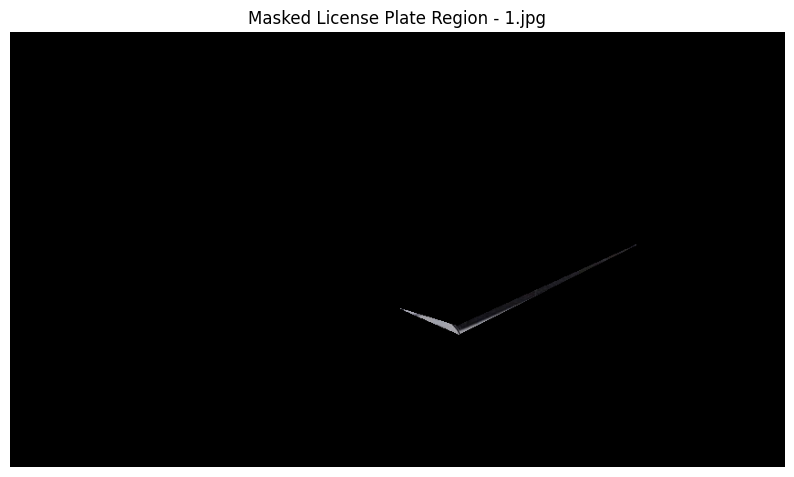

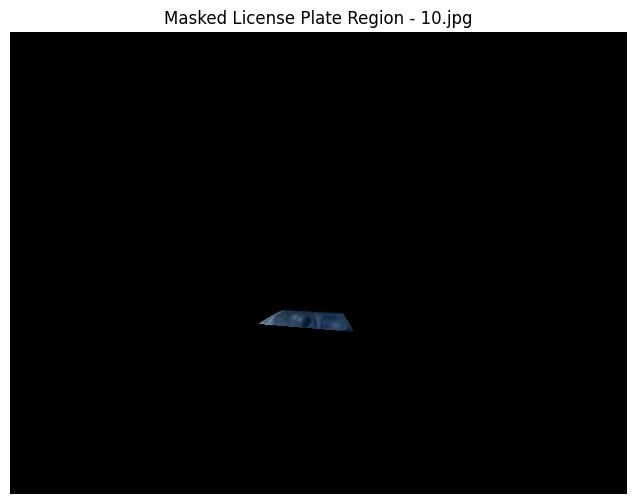

No license plate detected in 100.jpg


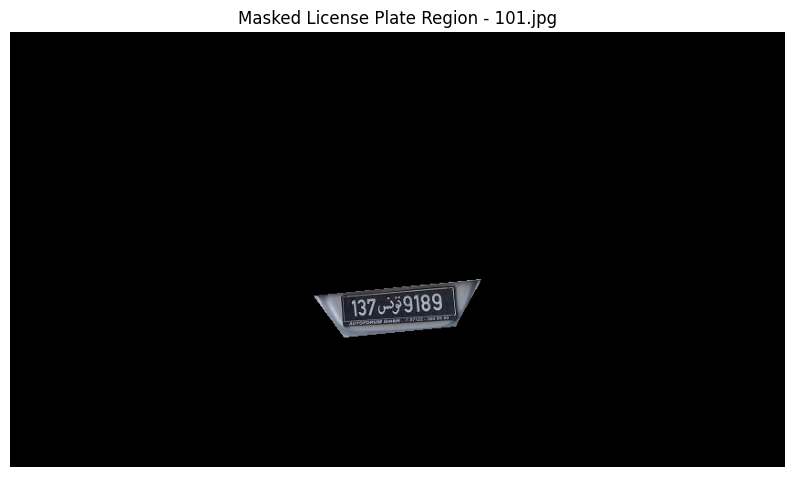

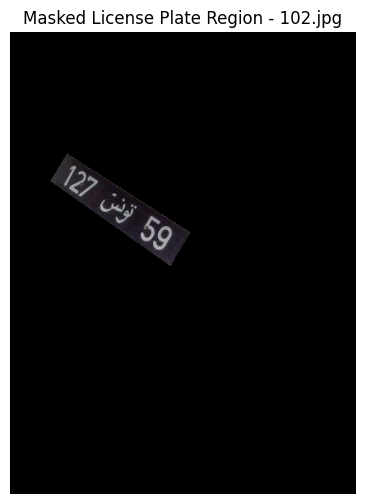

In [28]:
# Define the image folder path
image_folder = '/content/images/license_plates_detection_train'

# Get a list of image files in the folder
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])
# Loop through the first 5 images
for i, image_file in enumerate(image_files[:5]):
    # Load the image
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction and edge detection
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)

    # Find contours
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    # Find location of license plate
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    # If no location is found, continue to the next image
    if location is None:
        print(f"No license plate detected in {image_file}")
        continue

    # Create mask and extract license plate region
    mask = np.zeros(gray.shape, np.uint8)
    cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Display the masked license plate region
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Masked License Plate Region - {image_file}")
    plt.axis('off')
    plt.show()


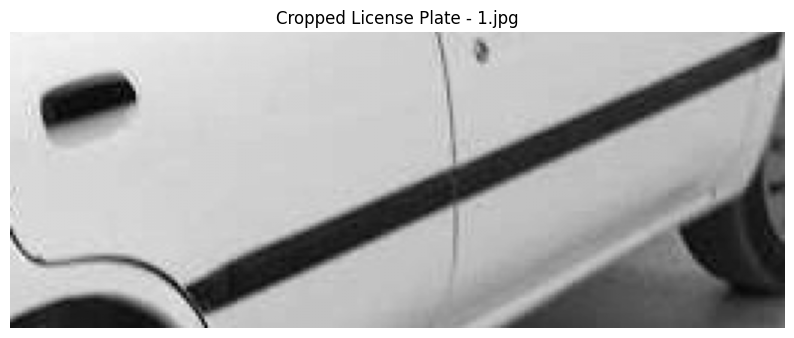

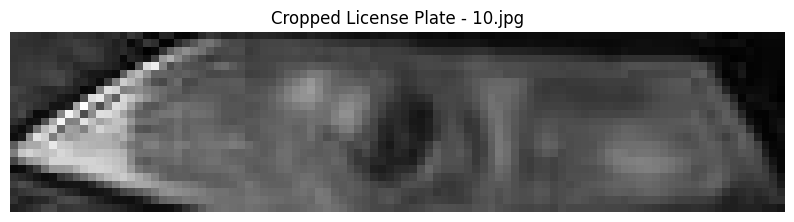

No license plate detected in 100.jpg


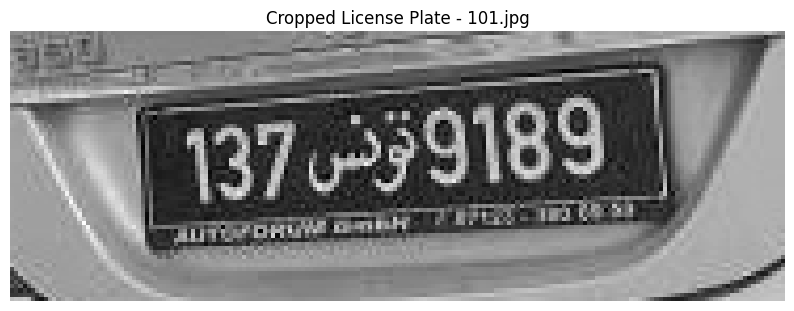

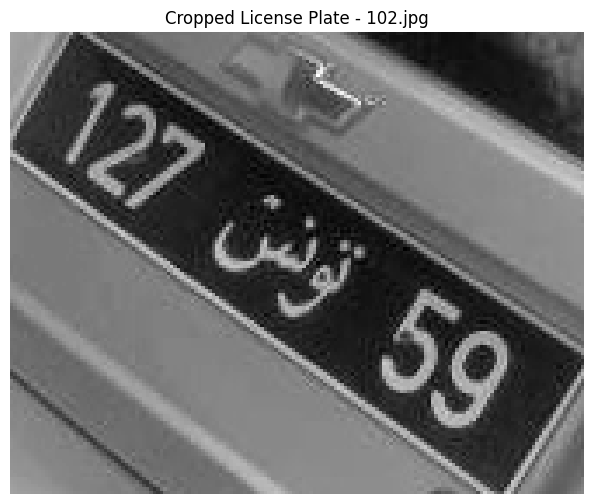

In [27]:
# Define the image folder path
image_folder = '/content/images/license_plates_detection_train'

# Get a list of image files in the folder
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])
# Loop through the first 5 images
for i, image_file in enumerate(image_files[:5]):
    # Load the image
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction and edge detection
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)

    # Find contours
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    # Find location of license plate
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    # If no location is found, continue to the next image
    if location is None:
        print(f"No license plate detected in {image_file}")
        continue

    # Create mask and extract license plate region
    mask = np.zeros(gray.shape, np.uint8)
    cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Check mask and get coordinates
    if np.any(mask):
        (x, y) = np.where(mask == 255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))

        # Ensure coordinates are within the image boundaries
        h, w = gray.shape
        x1, x2 = max(0, x1), min(h, x2)
        y1, y2 = max(0, y1), min(w, y2)

        # Crop the image
        cropped_image = gray[x1:x2+1, y1:y2+1]

        # Display the cropped image
        if cropped_image.size > 0:
            plt.figure(figsize=(10, 6))
            plt.imshow(cropped_image, cmap='gray')
            plt.title(f"Cropped License Plate - {image_file}")
            plt.axis('off')
            plt.show()
        else:
            print(f"No region found to crop for {image_file}.")
    else:
        print(f"Mask is empty. No contour detected for {image_file}.")


Detected Text in 1.jpg: []


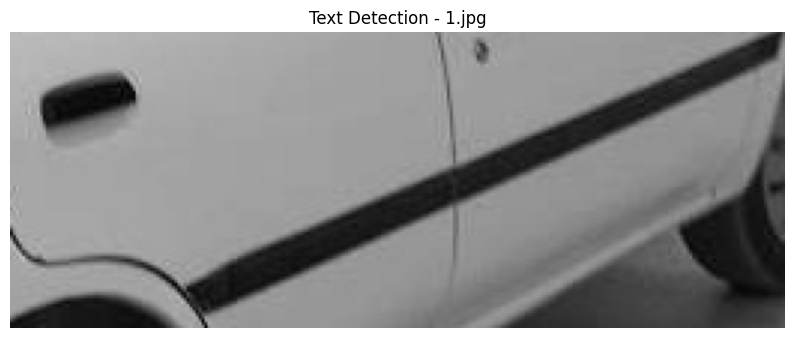

Detected Text in 10.jpg: []


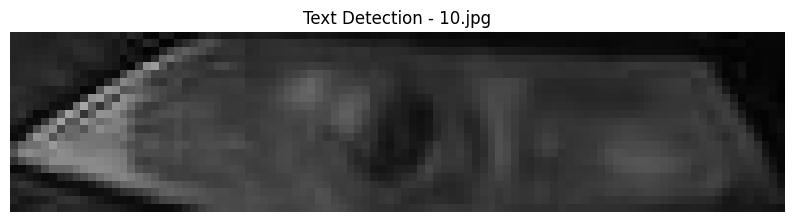

No license plate detected in 100.jpg
Detected Text in 101.jpg: [([[36, 18], [72, 18], [72, 44], [36, 44]], '137', 0.9996750818145799), ([[63.602760701502135, 16.345245332854052], [145.7185494199858, 9.731343604006629], [147.39723929849788, 40.654754667145944], [65.28145058001421, 47.268656395993375]], '10*39189', 0.1631797037012651)]


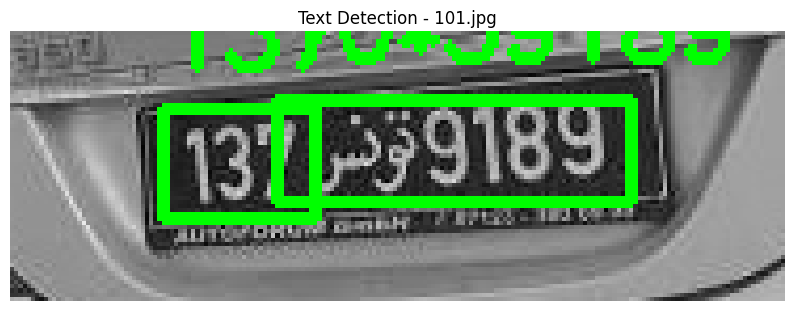

Detected Text in 102.jpg: [([[53, 47], [105, 47], [105, 89], [53, 89]], 'Urs', 0.062033920713285035), ([[100, 70], [150, 70], [150, 120], [100, 120]], '59', 0.9979085558894341), ([[21.27164295927077, 2.0668719800621593], [67.99114063142643, 30.733923957904903], [47.72835704072923, 63.93312801993784], [0.008859368573564286, 35.266076042095094]], '127', 0.700951337814331)]


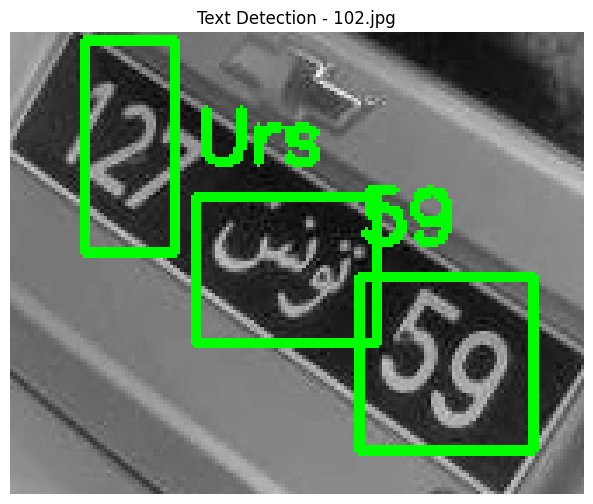

In [29]:
# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Define the image folder path
image_folder = '/content/images/license_plates_detection_train'

# Get a list of image files in the folder
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])

# Loop through the first 5 images
for i, image_file in enumerate(image_files[:5]):
    # Load the image
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction and edge detection
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)

    # Find contours
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    # Find location of license plate
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    # If no location is found, continue to the next image
    if location is None:
        print(f"No license plate detected in {image_file}")
        continue

    # Create mask and extract license plate region
    mask = np.zeros(gray.shape, np.uint8)
    cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Check mask and get coordinates
    if np.any(mask):
        (x, y) = np.where(mask == 255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))

        # Ensure coordinates are within the image boundaries
        h, w = gray.shape
        x1, x2 = max(0, x1), min(h, x2)
        y1, y2 = max(0, y1), min(w, y2)

        # Crop the image
        cropped_image = gray[x1:x2+1, y1:y2+1]

        # If cropped image is empty, skip to next
        if cropped_image.size == 0:
            print(f"No region found to crop for {image_file}.")
            continue

        # Convert the cropped image to RGB (EasyOCR expects color images)
        cropped_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_GRAY2RGB)

        # Perform text detection
        result = reader.readtext(cropped_rgb)

        # Display the result
        print(f"Detected Text in {image_file}: {result}")

        # Optional: Draw bounding boxes on the image
        for (bbox, text, prob) in result:
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple([int(val) for val in top_left])
            bottom_right = tuple([int(val) for val in bottom_right])
            cv2.rectangle(cropped_rgb, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(cropped_rgb, text, (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Display the image with detected text
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(cropped_rgb, cv2.COLOR_BGR2RGB))
        plt.title(f"Text Detection - {image_file}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Mask is empty. No contour detected for {image_file}.")


No text detected in 1.jpg.
No text detected in 10.jpg.
No license plate detected in 100.jpg
Detected Text in 101.jpg: 137


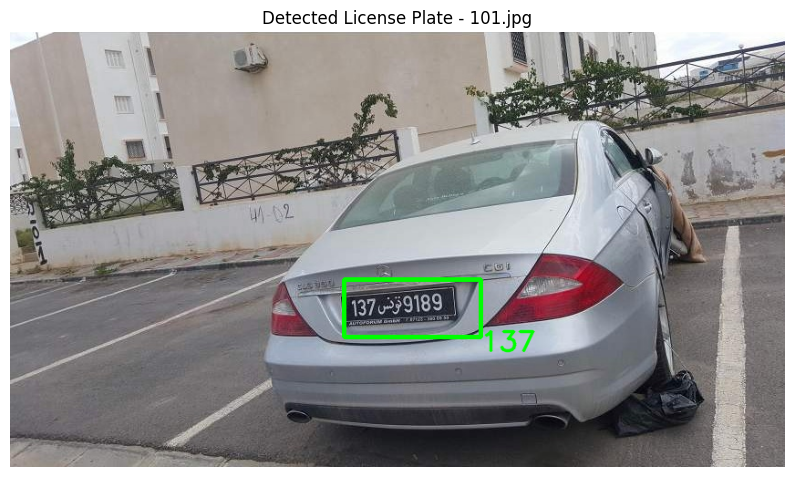

Detected Text in 102.jpg: Urs


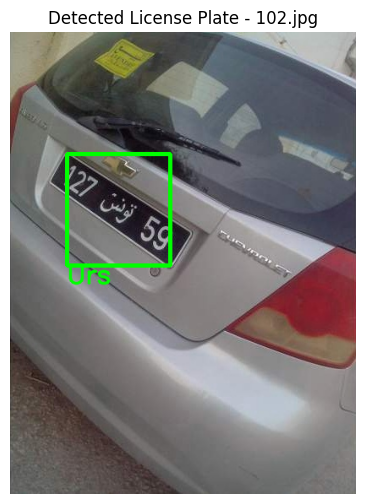

In [30]:
# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])

# Define the image folder path
image_folder = '/content/images/license_plates_detection_train'

# Get a list of image files in the folder
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])

# Loop through the first 5 images
for i, image_file in enumerate(image_files[:5]):
    # Load the image
    img_path = os.path.join(image_folder, image_file)
    img = cv2.imread(img_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction and edge detection
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)

    # Find contours
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    # Find location of license plate
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break

    # If no location is found, continue to the next image
    if location is None:
        print(f"No license plate detected in {image_file}")
        continue

    # Create mask and extract license plate region
    mask = np.zeros(gray.shape, np.uint8)
    cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Check mask and get coordinates
    if np.any(mask):
        (x, y) = np.where(mask == 255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))

        # Ensure coordinates are within the image boundaries
        h, w = gray.shape
        x1, x2 = max(0, x1), min(h, x2)
        y1, y2 = max(0, y1), min(w, y2)

        # Crop the image
        cropped_image = gray[x1:x2+1, y1:y2+1]

        # If cropped image is empty, skip to next
        if cropped_image.size == 0:
            print(f"No region found to crop for {image_file}.")
            continue

        # Convert the cropped image to RGB (EasyOCR expects color images)
        cropped_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_GRAY2RGB)

        # Perform text detection
        result = reader.readtext(cropped_rgb)

        # Check if text was detected
        if len(result) > 0:
            # Extract detected text
            text = result[0][-2]
            print(f"Detected Text in {image_file}: {text}")

            # Font settings
            font = cv2.FONT_HERSHEY_SIMPLEX

            # Calculate position for text
            text_position = (location[0][0][0], location[1][0][1] + 60)

            # Draw the detected text on the image
            res = cv2.putText(img,
                              text=text,
                              org=text_position,
                              fontFace=font,
                              fontScale=1,
                              color=(0, 255, 0),
                              thickness=2,
                              lineType=cv2.LINE_AA)

            # Draw a rectangle around the license plate
            res = cv2.rectangle(img,
                                tuple(location[0][0]),
                                tuple(location[2][0]),
                                (0, 255, 0),
                                3)

            # Display the image with text and rectangle
            plt.figure(figsize=(10, 6))
            plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
            plt.title(f"Detected License Plate - {image_file}")
            plt.axis('off')
            plt.show()
        else:
            print(f"No text detected in {image_file}.")
    else:
        print(f"Mask is empty. No contour detected for {image_file}.")
